In [2]:
import pandas as pd
import numpy as np

In [3]:
df  = pd.read_csv('/content/drive/MyDrive/data/creditcard.csv')

In [4]:
df['Class'].value_counts().values

array([284315,    492])

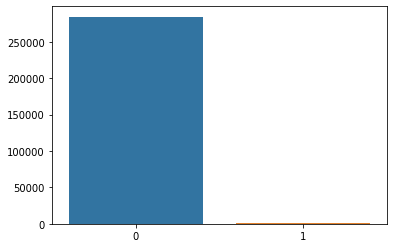

In [5]:
import seaborn as sns
sns.barplot(x = df['Class'].value_counts().keys(),y = df['Class'].value_counts().values)

In [6]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [8]:
y_train.value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [9]:
len(X.columns)

29

In [10]:
### creating the simple ANN model and train our model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [11]:
n_input = len(X.columns)
model = Sequential()
model.add(Dense(50,input_dim = n_input,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss= 'binary_crossentropy',optimizer = 'adam')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1500      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0206
Epoch 2/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0122
Epoch 3/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0125
Epoch 4/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0088
Epoch 5/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0089
Epoch 6/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0088
Epoch 7/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0067
Epoch 8/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0089
Epoch 9/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0084
Epoch 10/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0065


In [14]:
from sklearn.metrics import roc_auc_score
y_pred1 = model.predict(X_test)
roc_score = roc_auc_score(y_test,y_pred1)

In [15]:
roc_score

0.9701741599027458

## weighted neural network keras
1. define weight
2.fit the model with those specific weight

In [16]:
weight_assign = {0:1,1:550}
n_input = len(X.columns)
model = Sequential()
model.add(Dense(50,input_dim = n_input,activation='relu',kernel_initializer='HeNormal'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss= 'binary_crossentropy',optimizer = 'adam')

In [17]:
model.fit(X_train,y_train,epochs = 10,class_weight=weight_assign)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/10
6231/6231 [==============================] - 12s 2ms/step - loss: 2.8347
Epoch 2/10
6231/6231 [==============================] - 12s 2ms/step - loss: 2.0098
Epoch 3/10
6231/6231 [==============================] - 12s 2ms/step - loss: 2.4713
Epoch 4/10
6231/6231 [==============================] - 12s 2ms/step - loss: 2.6288
Epoch 5/10
6231/6231 [==============================] - 12s 2ms/step - loss: 2.6928
Epoch 6/10
6231/6231 [==============================] - 12s 2ms/step - loss: 1.5660
Epoch 7/10
6231/6231 [==============================] - 12s 2ms/step - loss: 2.3207
Epoch 8/10
6231/6231 [==============================] - 12s 2ms/step - loss: 2.0413
Epoch 9/10
6231/6231 [==============================] - 12s 2ms/step - loss: 1.9620
Epoch 10/10
6231/6231 [==============================] - 12s 2ms/step - loss: 2.3527


In [18]:
y_pred2 = model.predict(X_test)
roc_auc_score(y_test,y_pred2)

0.9781934659523837